# Color Deconvolution

In [50]:
from __future__ import print_function

import histomicstk as htk

import numpy as np
import scipy as sp

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams['image.cmap'] = 'gray'
titlesize = 24

#### Load input image

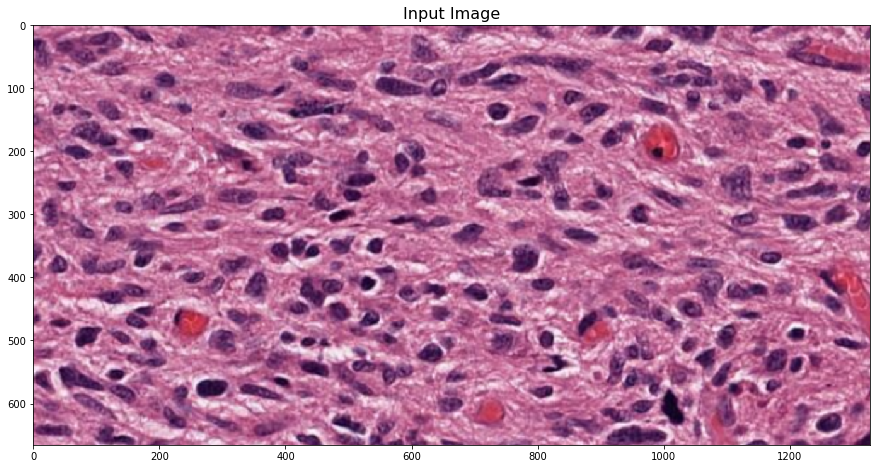

In [51]:
inputImageFile = ('https://data.kitware.com/api/v1/file/'
                  '57802ac38d777f12682731a2/download')  # H&E.png

imInput = skimage.io.imread(inputImageFile)[:, :, :3]

plt.imshow(imInput)
_ = plt.title('Input Image', fontsize=16)

#### Supervised color deconvolution with a known stain matrix

stain_color_map:
{'eosin': [0.07, 0.99, 0.11], 'null': [0.0, 0.0, 0.0], 'hematoxylin': [0.65, 0.7, 0.29], 'dab': [0.27, 0.57, 0.78]}


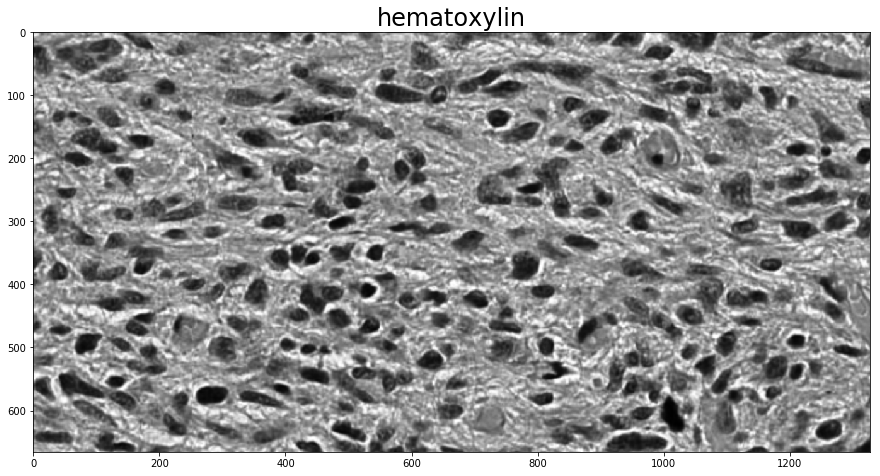

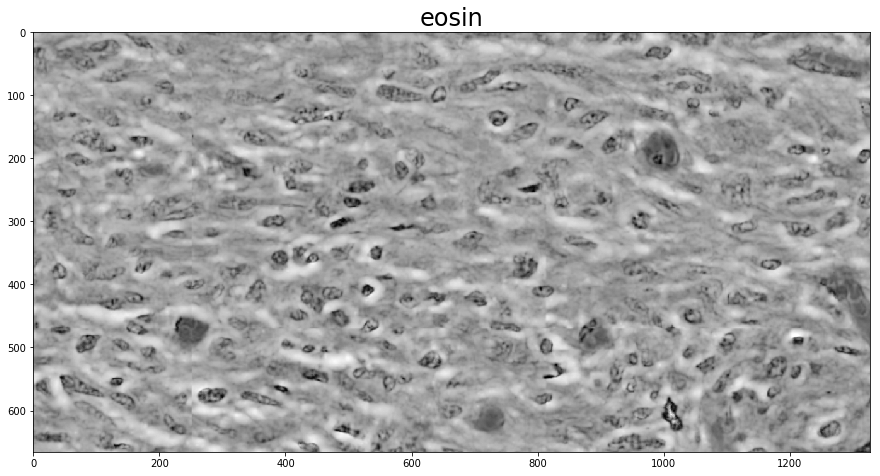

In [52]:
# create stain to color map
stain_color_map = htk.preprocessing.color_deconvolution.stain_color_map
print('stain_color_map:', stain_color_map, sep='\n')

# specify stains of input image
stains = ['hematoxylin',  # nuclei stain
          'eosin',        # cytoplasm stain
          'null']         # set to null if input contains only two stains

# create stain matrix
W = np.array([stain_color_map[st] for st in stains]).T

# perform standard color deconvolution
imDeconvolved = htk.preprocessing.color_deconvolution.color_deconvolution(imInput, W)

# Display results
plt.figure()
plt.imshow(imDeconvolved.Stains[:, :, 0])
plt.title(stain_1, fontsize=titlesize)

plt.figure()
plt.imshow(imDeconvolved.Stains[:, :, 1])
_ = plt.title(stain_2, fontsize=titlesize)

#### Unsupervised color deconvolution using sparse non-negative matrix factorization

Estimated stain colors (in rows):
[[ 0.48475365  0.78114376  0.3934823 ]
 [ 0.18976763  0.81925651  0.54111645]]


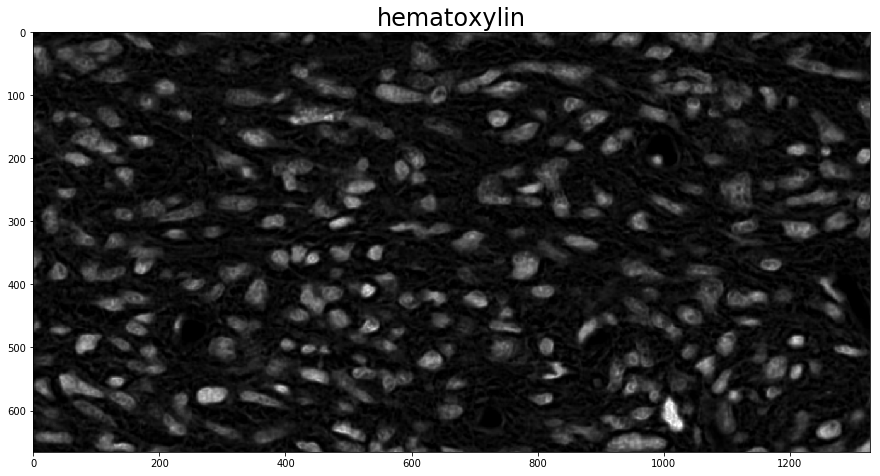

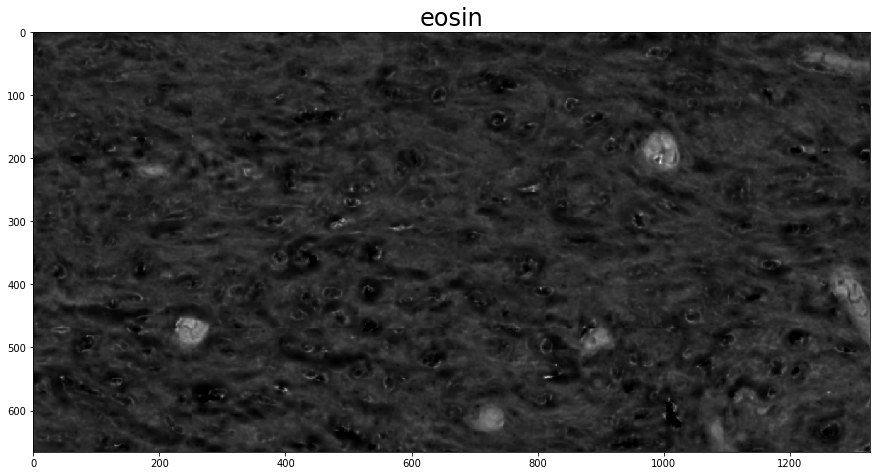

In [53]:
# create initial stain matrix
W_init = W[:, :2]

# perform sparse color deconvolution
sparsity_factor = 0.5

imDeconvolved, W_est = htk.preprocessing.color_deconvolution.sparse_color_deconvolution(
    imInput, W_init, sparsity_factor)

print('Estimated stain colors (in rows):', W_est.T, sep='\n')

# Display results
plt.figure()
plt.imshow(imDeconvolved[:, :, 0])
plt.title(stain_1, fontsize=titlesize)

plt.figure()
plt.imshow(imDeconvolved[:, :, 1])
_ = plt.title(stain_2, fontsize=titlesize)